In [1]:
from __future__ import division
import requests
import numpy as np
from StringIO import StringIO
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline

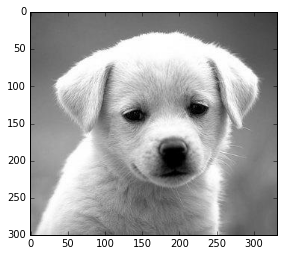

In [2]:
resp = requests.get('http://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15463-f10/www/final_proj/www/gmethvin/puppy.jpg')
img = np.array(Image.open(StringIO(resp.content)))
plt.imshow(img)

In [3]:
img.shape

(300, 332, 3)

In [4]:
# even though it's a grayscale, it has 3 channels (as an RGB would have)
# except all channels are equal
np.array_equal(img[:, :, 0], img[:, :, 1]) and np.array_equal(img[:, :, 1], img[:, :, 2])

True

In [5]:
# use the first channel only
img_ch1 = img[:, :, 0]

In [6]:
# sample of the image content, all values are between 0-255 (pixel intensity)
img_ch1[:280, :300]

array([[ 89,  88,  88, ...,  70,  70,  69],
       [ 89,  89,  88, ...,  71,  71,  70],
       [ 90,  89,  89, ...,  71,  71,  71],
       ..., 
       [149, 148, 147, ..., 104, 104, 104],
       [151, 150, 149, ..., 103, 103, 103],
       [152, 152, 150, ..., 102, 102, 103]], dtype=uint8)

In [7]:
# pad the image with: p = m - 2 (m is odd) given kernel m x m, u x v (image)
# the resulted padded image shape is: (u + 2p) x (v + 2p)
# so if the kernel is 3 x 3, the then 'p' is 1 as per: 3 - 2 = 1
# therefore the padded image shape becomes: (u + 2) x (v + 2)
# or in the case of this image, (300 + 2) x (332 + 2) = (302, 334)
# effectively adding one pixel per each sides of the image
img_padded = np.pad(img_ch1, (1, 1), 'constant')
print(img_ch1.shape)
print(img_padded.shape)

(300, 332)
(302, 334)


In [8]:
# identity kernel as per: https://en.wikipedia.org/wiki/Kernel_(image_processing)
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

In [15]:
def convolution(img, kernel):
    
    # padding the image:
    #    p = 3 - 2, which is 1 in this case
    kernel_size = kernel.shape[0] # 3 in this case (3 x 3 for m x m)
    p =  kernel_size - 2
    img_padded = np.pad(img, (p, p), 'constant')
    img_conv = np.zeros(img.shape)

    for row in xrange(img_padded.shape[0] - (2 * p)):
        for col in xrange(img_padded.shape[1] - (2 * p)):
            # selecting a patch of 3x3 on the image
            patch = img_padded[row:row + kernel_size, col: col + kernel_size]
            # multiplying each pixel in the patch by the
            # corresponding entry in the kernel
            # then adding them all up (all 9 of them in this case) 
            img_conv[row, col] = np.sum(patch * identity_kernel)
    
    return img_conv

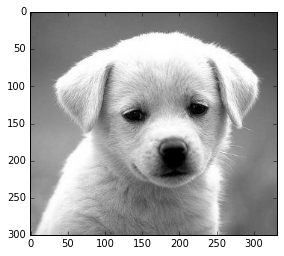

In [17]:
img1_conv = convolution(img_ch1, identity_kernel)
plt.imshow(img1_conv, cmap = plt.get_cmap('gray'))